## Data Loading

In [1160]:
import pandas as pd

df=pd.read_csv("C:\Food-Service-EDA\data\Food data.csv")

df.head(10)


<>:3: SyntaxWarning: invalid escape sequence '\F'
<>:3: SyntaxWarning: invalid escape sequence '\F'
C:\Users\Sohai\AppData\Local\Temp\ipykernel_23436\3611631668.py:3: SyntaxWarning: invalid escape sequence '\F'
  df=pd.read_csv("C:\Food-Service-EDA\data\Food data.csv")


,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0,12/19/2022,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,1,11/21/2023,244.0,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,2,2/1/2022,148.0,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,3,3/19/2023,157.0,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,4,7/18/2022,297.0,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT
5,5,3/2/2023,241.0,18,16.863506,79.285920,3,0,11.834878,Intermediate,dairy
6,6,4/18/2022,443.0,16,19.888627,77.328136,0,0,22.862659,Beginner,Vegetables
7,7,12/16/2023,416.0,16,18.559591,75.786502,5,1,34.599442,Intermediate,MeAt
8,8,7/7/2023,439.0,18,24.111027,43.395803,4,0,17.459149,EXPERT,dairy
9,9,11/7/2023,267.0,7,25.412493,89.405183,1,0,23.067392,EXPERT,GRAINS


In [1161]:
df.info() # prints information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1822 non-null   int64  
 1   date              1822 non-null   object 
 2   meals_served      1790 non-null   float64
 3   kitchen_staff     1804 non-null   object 
 4   temperature_C     1822 non-null   float64
 5   humidity_percent  1806 non-null   float64
 6   day_of_week       1822 non-null   int64  
 7   special_event     1822 non-null   object 
 8   past_waste_kg     1806 non-null   float64
 9   staff_experience  1485 non-null   object 
 10  waste_category    1801 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 156.7+ KB


## Data Cleaning

In [1162]:
df=df.drop('ID',axis=1) #ID column dropped as it has no significance in this context, its 
# used to index the records

In [1163]:
df.isnull().mean()*100 # Calculating percentage of missing values in the column

date                 0.000000
meals_served         1.756312
kitchen_staff        0.987925
temperature_C        0.000000
humidity_percent     0.878156
day_of_week          0.000000
special_event        0.000000
past_waste_kg        0.878156
staff_experience    18.496158
waste_category       1.152580
dtype: float64

In [1164]:
df.loc[df.duplicated()]

,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
911,12/19/2022,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
912,11/21/2023,244.0,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
913,2/1/2022,148.0,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
914,3/19/2023,157.0,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
915,7/18/2022,297.0,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT
...,...,...,...,...,...,...,...,...,...,...
1817,3/29/2022,395.0,18,17.354199,45.138435,1,0,40.550668,Intermediate,GRAINS
1818,11/27/2022,483.0,11,24.912137,59.485091,6,0,36.470276,intermediate,dairy
1819,4/12/2023,243.0,11,28.870946,70.508404,2,0,19.767203,Intermediate,MeAt
1820,2/14/2022,406.0,10,19.061638,55.286642,0,0,28.560361,EXPERT,MEAT


In [1165]:
#Drop duplicate records in the dataframe.
df=df.drop_duplicates()
print('Dataset size after dropping duplicate rows:',df.shape)


Dataset size after dropping duplicate rows: (1054, 10)


In [1166]:
#Data type correction for date column
df['date']=pd.to_datetime(df['date'])
print(df.date.dtype)
df.head(10)

datetime64[ns]


,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,2022-12-19,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,2023-11-21,244.0,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,2022-02-01,148.0,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,2023-03-19,157.0,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,2022-07-18,297.0,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT
5,2023-03-02,241.0,18,16.863506,79.285920,3,0,11.834878,Intermediate,dairy
6,2022-04-18,443.0,16,19.888627,77.328136,0,0,22.862659,Beginner,Vegetables
7,2023-12-16,416.0,16,18.559591,75.786502,5,1,34.599442,Intermediate,MeAt
8,2023-07-07,439.0,18,24.111027,43.395803,4,0,17.459149,EXPERT,dairy
9,2023-11-07,267.0,7,25.412493,89.405183,1,0,23.067392,EXPERT,GRAINS


In [1167]:
df.isnull().mean()*100 # Calculating percentage of missing values in the column after removinf duplicates

date                 0.000000
meals_served         3.036053
kitchen_staff        1.707780
temperature_C        0.000000
humidity_percent     1.518027
day_of_week          0.000000
special_event        0.000000
past_waste_kg        1.518027
staff_experience    18.785579
waste_category       1.992410
dtype: float64

In [1168]:
#Soritng the dataset in ascending order of the date column
df = df.sort_values(by='date', ascending=True)
df.head(13)

,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
341,2022-01-01,202.0,9,31.976787,66.826645,5,0,45.445455,Intermediate,MEAT
364,2022-01-01,202.0,9,32.318759,66.826645,5,0,45.445455,Intermediate,MEAT
171,2022-01-02,448.0,16,10.092464,56.130327,6,0,29.890039,intermediate,GRAINS
849,2022-01-02,448.0,16,10.128629,56.130327,6,0,29.890039,intermediate,GRAINS
141,2022-01-03,370.0,14,30.498673,64.634984,0,0,41.551615,Beginner,Vegetables
656,2022-01-03,370.0,14,30.759733,64.634984,0,0,41.551615,Beginner,Vegetables
99,2022-01-04,206.0,11,15.715629,74.284147,1,0,22.281919,Beginner,MeAt
47,2022-01-04,NaN,11,15.740215,74.284147,1,0,22.281919,Beginner,MeAt
958,2022-01-04,206.0,11,15.740215,74.284147,1,0,22.281919,Beginner,MeAt
346,2022-01-05,171.0,13,32.440281,78.371753,2,0,34.982054,NaN,dairy


In [1169]:
# Impute missing 'meals_served' using the mean value for the same date
df['meals_served'] = df.groupby('date')['meals_served'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

df.isnull().sum()


C:\Users\Sohai\AppData\Local\Temp\ipykernel_23436\2888126028.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['meals_served'] = df.groupby('date')['meals_served'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


date                  0
meals_served          0
kitchen_staff        18
temperature_C         0
humidity_percent     16
day_of_week           0
special_event         0
past_waste_kg        16
staff_experience    198
waste_category       21
dtype: int64

In [1170]:
# Impute missing 'kitchen_staff' using forward and backward fill for the same date,sicne kitchen staff is constant on a particualr date
df['kitchen_staff'] = df.groupby('date')['kitchen_staff'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

df.isnull().sum()

C:\Users\Sohai\AppData\Local\Temp\ipykernel_23436\1495948591.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['kitchen_staff'] = df.groupby('date')['kitchen_staff'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


date                  0
meals_served          0
kitchen_staff         0
temperature_C         0
humidity_percent     16
day_of_week           0
special_event         0
past_waste_kg        16
staff_experience    198
waste_category       21
dtype: int64

In [1171]:
# Impute missing 'Humidity' using backward and forward fill since humidity is constant for a particular date
df['humidity_percent'] = df.groupby('date')['humidity_percent'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

df.isnull().sum()

C:\Users\Sohai\AppData\Local\Temp\ipykernel_23436\2038740537.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['humidity_percent'] = df.groupby('date')['humidity_percent'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


date                  0
meals_served          0
kitchen_staff         0
temperature_C         0
humidity_percent      0
day_of_week           0
special_event         0
past_waste_kg        16
staff_experience    198
waste_category       21
dtype: int64

In [1172]:
# Impute missing 'meals_served' using f-fill and b-fill.since its constant for a particular date
df['past_waste_kg'] = df.groupby('date')['past_waste_kg'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

df.isnull().sum()

C:\Users\Sohai\AppData\Local\Temp\ipykernel_23436\540970322.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['past_waste_kg'] = df.groupby('date')['past_waste_kg'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


date                  0
meals_served          0
kitchen_staff         0
temperature_C         0
humidity_percent      0
day_of_week           0
special_event         0
past_waste_kg         0
staff_experience    198
waste_category       21
dtype: int64

In [1173]:
df['staff_experience']=df.staff_experience.str.replace('intermediate','Intermediate')
df.staff_experience.value_counts()

staff_experience
Intermediate    412
Beginner        214
EXPERT          207
Pro              23
Name: count, dtype: int64

In [1174]:
df['staff_experience']=df.staff_experience.fillna(df['staff_experience'].mode()[0])
df.isnull().sum()

date                 0
meals_served         0
kitchen_staff        0
temperature_C        0
humidity_percent     0
day_of_week          0
special_event        0
past_waste_kg        0
staff_experience     0
waste_category      21
dtype: int64

In [1175]:
df.waste_category.value_counts() # Checking for data inconsistency

waste_category
MEAT          229
GRAINS        214
dairy         191
Vegetables    190
MeAt          180
Barley         15
Wheat          14
Name: count, dtype: int64

In [1176]:
df['waste_category']=df.waste_category.str.replace('MeAt', 'MEAT')

In [1177]:
df.waste_category.value_counts() # Checking for data inconsistency

waste_category
MEAT          409
GRAINS        214
dairy         191
Vegetables    190
Barley         15
Wheat          14
Name: count, dtype: int64

In [1178]:
df['waste_category']=df.waste_category.fillna(df['waste_category'].mode()[0])
df.isnull().sum()

date                0
meals_served        0
kitchen_staff       0
temperature_C       0
humidity_percent    0
day_of_week         0
special_event       0
past_waste_kg       0
staff_experience    0
waste_category      0
dtype: int64

In [1179]:
df.special_event.value_counts() #Checking for data inconsistency

special_event
0       956
1        90
One       8
Name: count, dtype: int64

In [1180]:
df["special_event"]=df.special_event.str.replace('One','1')
df.special_event.value_counts()

special_event
0     956
1      90
1       8
Name: count, dtype: int64

In [1181]:
df['special_event']=pd.to_numeric(df['special_event'],errors='coerce')
df.special_event.value_counts()

special_event
0    956
1     98
Name: count, dtype: int64

In [1182]:
df.special_event.value_counts() #Checking for data inconsistency

special_event
0    956
1     98
Name: count, dtype: int64

In [1183]:
df.kitchen_staff.value_counts()

kitchen_staff
12        81
10        79
13        77
5         77
19        73
15        72
9         71
7         69
14        67
18        67
11        64
6         64
17        63
8         62
16        62
ten        4
eleven     2
Name: count, dtype: int64

In [1184]:
#fixing the data inconsistencies
df['kitchen_staff'] = df['kitchen_staff'].str.replace('ten', '10')
df['kitchen_staff'] = df['kitchen_staff'].str.replace('eleven', '11')

df['kitchen_staff'] = pd.to_numeric(df['kitchen_staff'], errors='coerce')

In [1185]:
df.kitchen_staff.value_counts()

kitchen_staff
10    83
12    81
13    77
5     77
19    73
15    72
9     71
7     69
14    67
18    67
11    66
6     64
17    63
16    62
8     62
Name: count, dtype: int64

In [1186]:
df.waste_category.value_counts()

waste_category
MEAT          430
GRAINS        214
dairy         191
Vegetables    190
Barley         15
Wheat          14
Name: count, dtype: int64

Since "Wheat" and "Barley" are also forms of corn grains we will rename them to 'GRAINS'.

In [1187]:
df['waste_category'] = df['waste_category'].str.replace('Wheat', 'GRAINS')
df['waste_category'] = df['waste_category'].str.replace('Barley', 'GRAINS')
df['waste_category'] = df['waste_category'].str.replace('MEAT', 'Meat')
df['waste_category'] = df['waste_category'].str.replace('dairy', 'Dairy')
df['waste_category'] = df['waste_category'].str.replace('GRAINS', 'Grains')
df.waste_category.value_counts()
df.waste_category.value_counts()

waste_category
Meat          430
Grains        243
Dairy         191
Vegetables    190
Name: count, dtype: int64

In [1188]:
#To ensure new duplicate values are dropped before proceeding with the EDA
df=df.drop_duplicates()

In [1189]:
print("Information about the Cleaned dataset.")
print("--------------------------------------")
df.info()


Information about the Cleaned dataset.
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 953 entries, 341 to 736
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              953 non-null    datetime64[ns]
 1   meals_served      953 non-null    float64       
 2   kitchen_staff     953 non-null    int64         
 3   temperature_C     953 non-null    float64       
 4   humidity_percent  953 non-null    float64       
 5   day_of_week       953 non-null    int64         
 6   special_event     953 non-null    int64         
 7   past_waste_kg     953 non-null    float64       
 8   staff_experience  953 non-null    object        
 9   waste_category    953 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 81.9+ KB


## Exploratory Data Analysis (EDA)


In [1190]:
import seaborn as sns
import matplotlib.pyplot as plt

# To Produce a statistical summary about the cleaned dataset without the date column.
df.drop('date',axis=True).describe() 

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,372.129066,11.912907,22.103886,60.690869,2.989507,0.088143,26.956453
std,492.424122,4.309674,9.004274,17.299660,2.010449,0.283651,12.687375
min,100.000000,5.000000,-10.372207,30.121111,0.000000,0.000000,5.008394
25%,210.000000,8.000000,15.638504,46.035158,1.000000,0.000000,16.290064
50%,304.000000,12.000000,21.997427,61.548756,3.000000,0.000000,26.541719
75%,409.000000,16.000000,28.732093,75.714409,5.000000,0.000000,37.957480
max,4730.000000,19.000000,60.000000,89.982828,6.000000,1.000000,49.803703


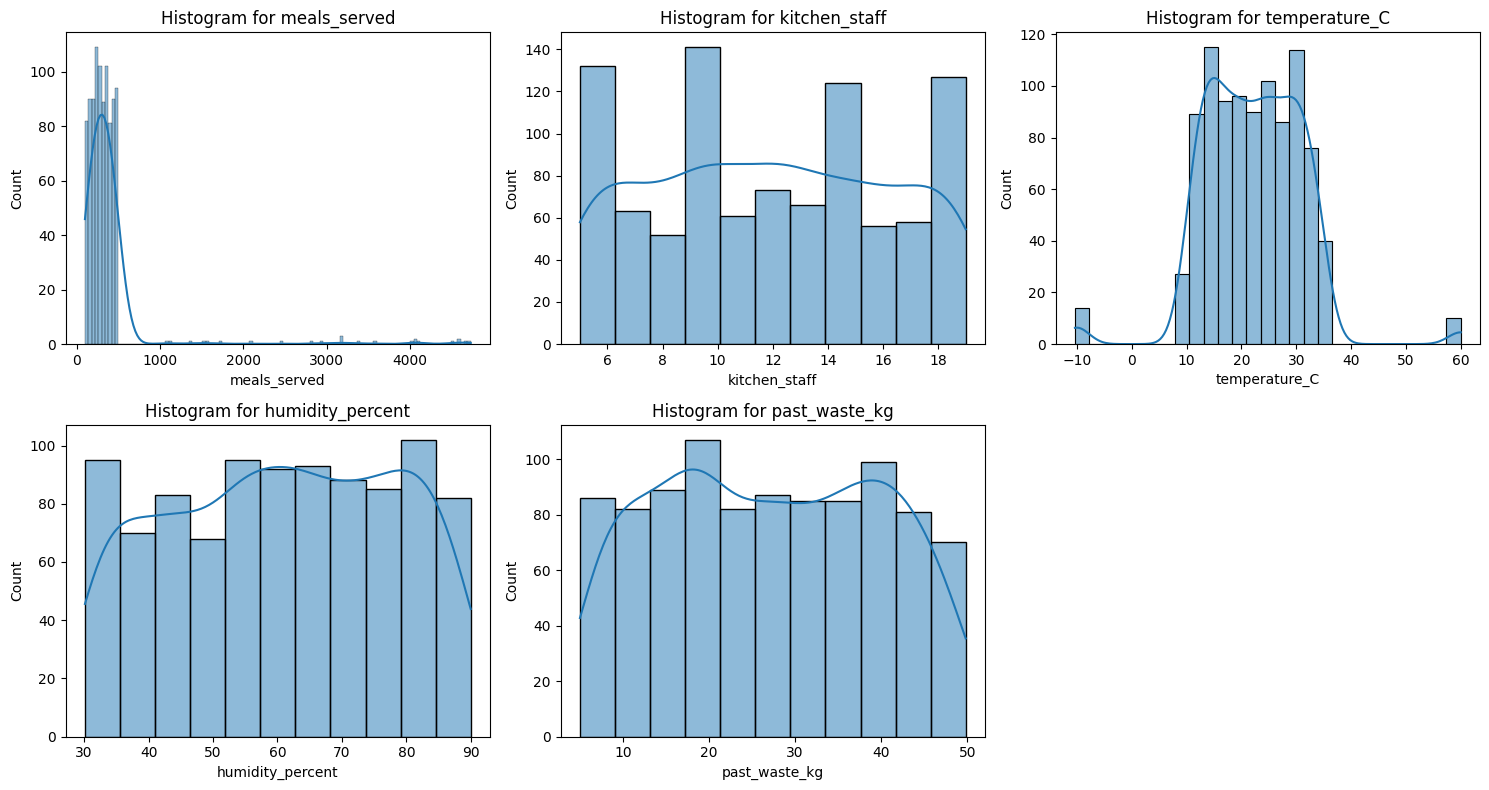

In [1191]:
import matplotlib.pyplot as plt
import seaborn as sns

# select columns with continous numerical data
cont_features = ['meals_served', 'kitchen_staff', 'temperature_C', 
                 'humidity_percent', 'past_waste_kg']

n_features = len(cont_features)
rows = 2
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(cont_features):
    sns.histplot(df[col], kde=True, ax=axes[i])  # Add kde=True if desired
    axes[i].set_title(f'Histogram for {col}')

# Turn off unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


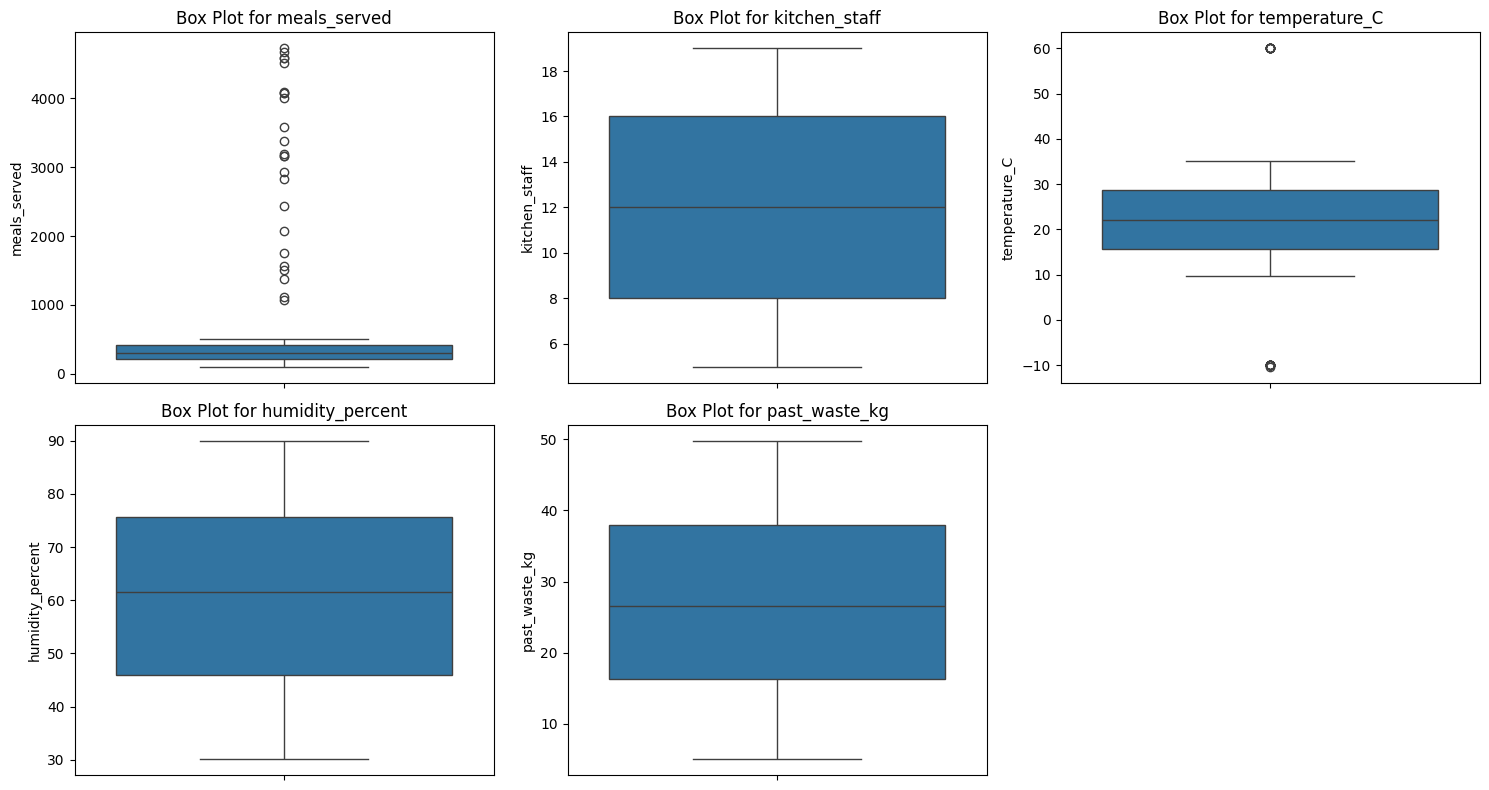

In [1192]:

# Define a list of continuous numerical features for analysis
cont_features = ['meals_served', 'kitchen_staff', 'temperature_C', 
                 'humidity_percent', 'past_waste_kg']

# Calculate the number of features to be plotted
n_features = len(cont_features)

# Define the layout for subplots: 2 rows and 3 columns
rows = 2
cols = 3

# Create a grid of subplots with the specified size
fig, axes = plt.subplots(rows, cols, figsize=(15, 8))

# Flatten the 2D axes array into a 1D array for easier indexing
axes = axes.flatten()

# Loop through each continuous feature and plot its boxplot
for i, col in enumerate(cont_features):
    sns.boxplot(data=df, y=col, ax=axes[i])  # Plot boxplot on the corresponding subplot
    axes[i].set_title(f'Box Plot for {col}')  # Set the title of the subplot

# Delete any unused subplots if there are more subplots than features
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping content
plt.tight_layout()

# Display the plot
plt.show()


## Outlier Detection and Treatment

In [1193]:
import pandas as pd

def detect_outliers_iqr(data, feature):
    """
    Detect outliers in a specified feature of a DataFrame using the IQR method.

    Parameters:
    data (pd.DataFrame): The input DataFrame containing the data.
    feature (str): The column name of the feature to check for outliers.

    Returns:
    outlier_values (pd.Series): The values identified as outliers.
    lower_bound (float): The lower threshold used to define outliers.
    upper_bound (float): The upper threshold used to define outliers.
    """

    # Calculate the 25th percentile (Q1) of the feature
    Q1 = data[feature].quantile(0.25)

    # Calculate the 75th percentile (Q3) of the feature
    Q3 = data[feature].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define lower bound as Q1 minus 1.5 times the IQR
    lower_bound = Q1 - 1.5 * IQR

    # Define upper bound as Q3 plus 1.5 times the IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers as values less than lower bound or greater than upper bound
    outliers = (data[feature] < lower_bound) | (data[feature] > upper_bound)

    # Extract the outlier values themselves
    outlier_values = data[feature][outliers]

    # Print the count of detected outliers for the feature
    print(f"Number of outliers for {feature} = {outliers.sum()}")

    # Return the outlier values and the bounds for further use
    return outlier_values, lower_bound, upper_bound



In [1194]:
outliers,lower_bound,upper_bound=detect_outliers_iqr(df,'temperature_C')
print(outliers)

Number of outliers for temperature_C = 24
923    -10.372207
1318   -10.000000
384    -10.000000
492    -10.000000
804     60.000000
290     60.000000
1612   -10.000000
701    -10.000000
537     60.000000
710    -10.000000
445    -10.000000
396     60.000000
238    -10.000000
300     60.000000
766     60.000000
1677    60.000000
404     60.000000
463    -10.000000
560     60.000000
345    -10.000000
641     60.000000
102    -10.000000
768    -10.000000
852    -10.000000
Name: temperature_C, dtype: float64


Using common sense and background knowledge,i have come to the conclusion that -10 and 60 degree temrpature is too low and high are abnormal condition for a kitchen environment.Hence we will clip these outliers to the upper and lower bounds.

Number of outliers for temperature_C = 0


<Axes: xlabel='temperature_C', ylabel='Count'>

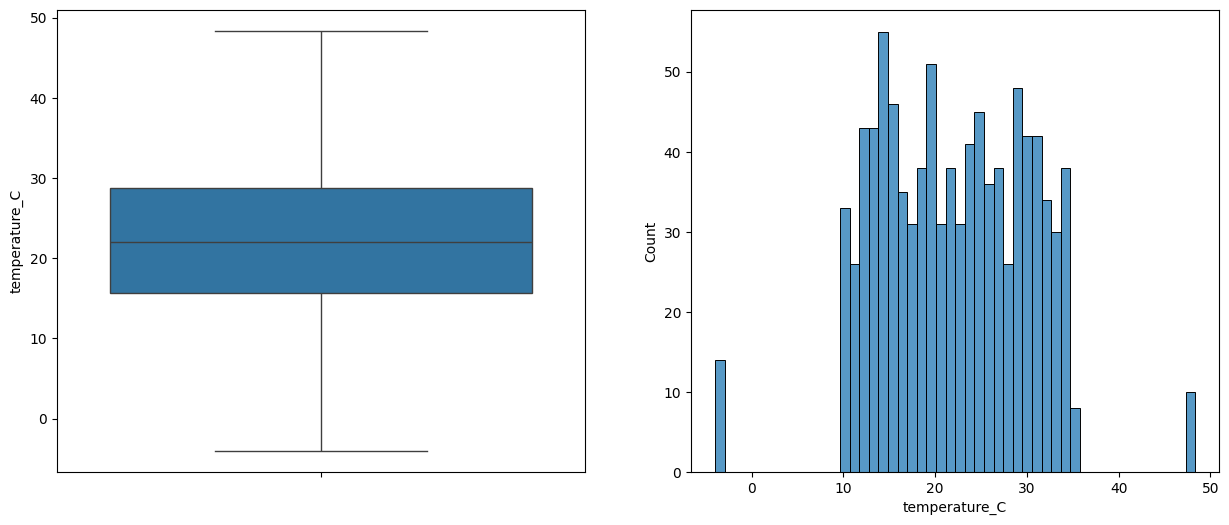

In [1195]:
# Clip (limit) the values in the 'temperature_C' column to be within the specified lower and upper bounds
df['temperature_C'] = df['temperature_C'].clip(lower=lower_bound, upper=upper_bound)

# Detect outliers in the 'temperature_C' column using the IQR method
outliers = detect_outliers_iqr(df, 'temperature_C')

# Create a figure for plotting with a specified size
plt.figure(figsize=(15, 6))

# Create the first subplot (1 row, 2 columns, 1st plot) to show a boxplot of temperature
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='temperature_C')  # Boxplot to visualize distribution and spot outliers

# Create the second subplot (1 row, 2 columns, 2nd plot) to show a histogram of temperature
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='temperature_C', bins=50)  # Histogram to visualize the frequency distribution


In [1196]:
outliers1,lower_meal,upper_meal=detect_outliers_iqr(df,'meals_served') # calling outlier detection function to return outliers,lower and upper bounds for  meals served.
outliers1

Number of outliers for meals_served = 24


714     4590.0
813     4590.0
425     4080.0
443     4080.0
284     3580.0
213     1510.0
321     3190.0
520     4510.0
129     2930.0
448     4010.0
244     1380.0
21      1110.0
176     3160.0
16      1560.0
285     2080.0
1320    1750.0
1279    4680.0
687     4730.0
318     1070.0
380     4100.0
265     2440.0
608     2830.0
451     3170.0
642     3380.0
Name: meals_served, dtype: float64

<Axes: xlabel='meals_served', ylabel='Count'>

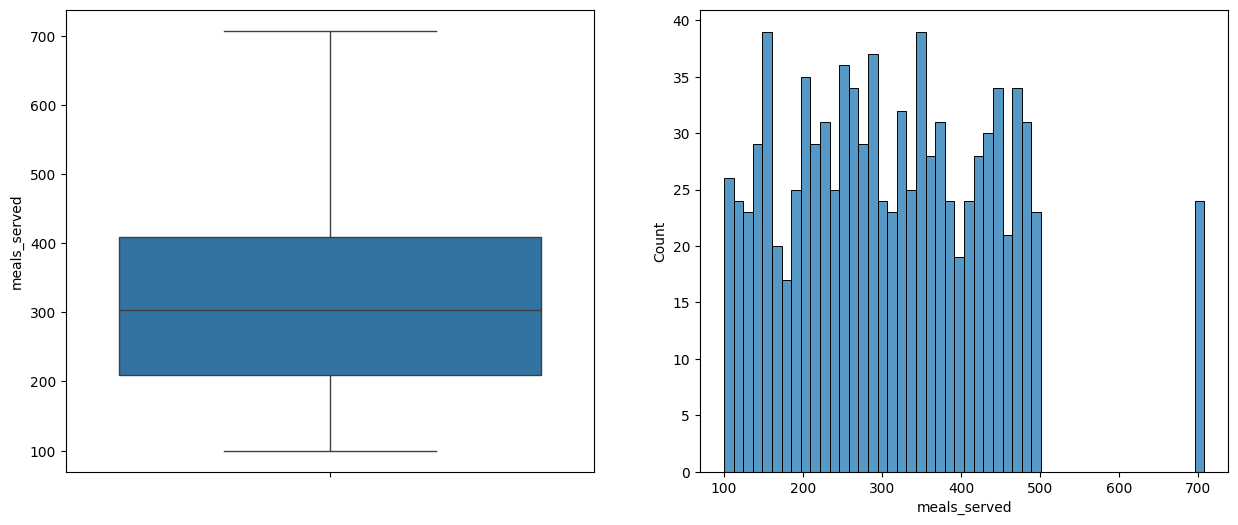

In [1197]:
# Clip (limit) the 'meals_served' column values to be within the specified lower and upper bounds
df['meals_served'] = df['meals_served'].clip(lower=lower_meal, upper=upper_meal)

# Create a new figure for plotting with a specified size
plt.figure(figsize=(15, 6))

# Create the first subplot (1 row, 2 columns, 1st plot) to show a boxplot of meals served
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='meals_served')  # Boxplot helps visualize the distribution and detect outliers

# Create the second subplot (1 row, 2 columns, 2nd plot) to show a histogram of meals served
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='meals_served', bins=50)  # Histogram shows frequency distribution


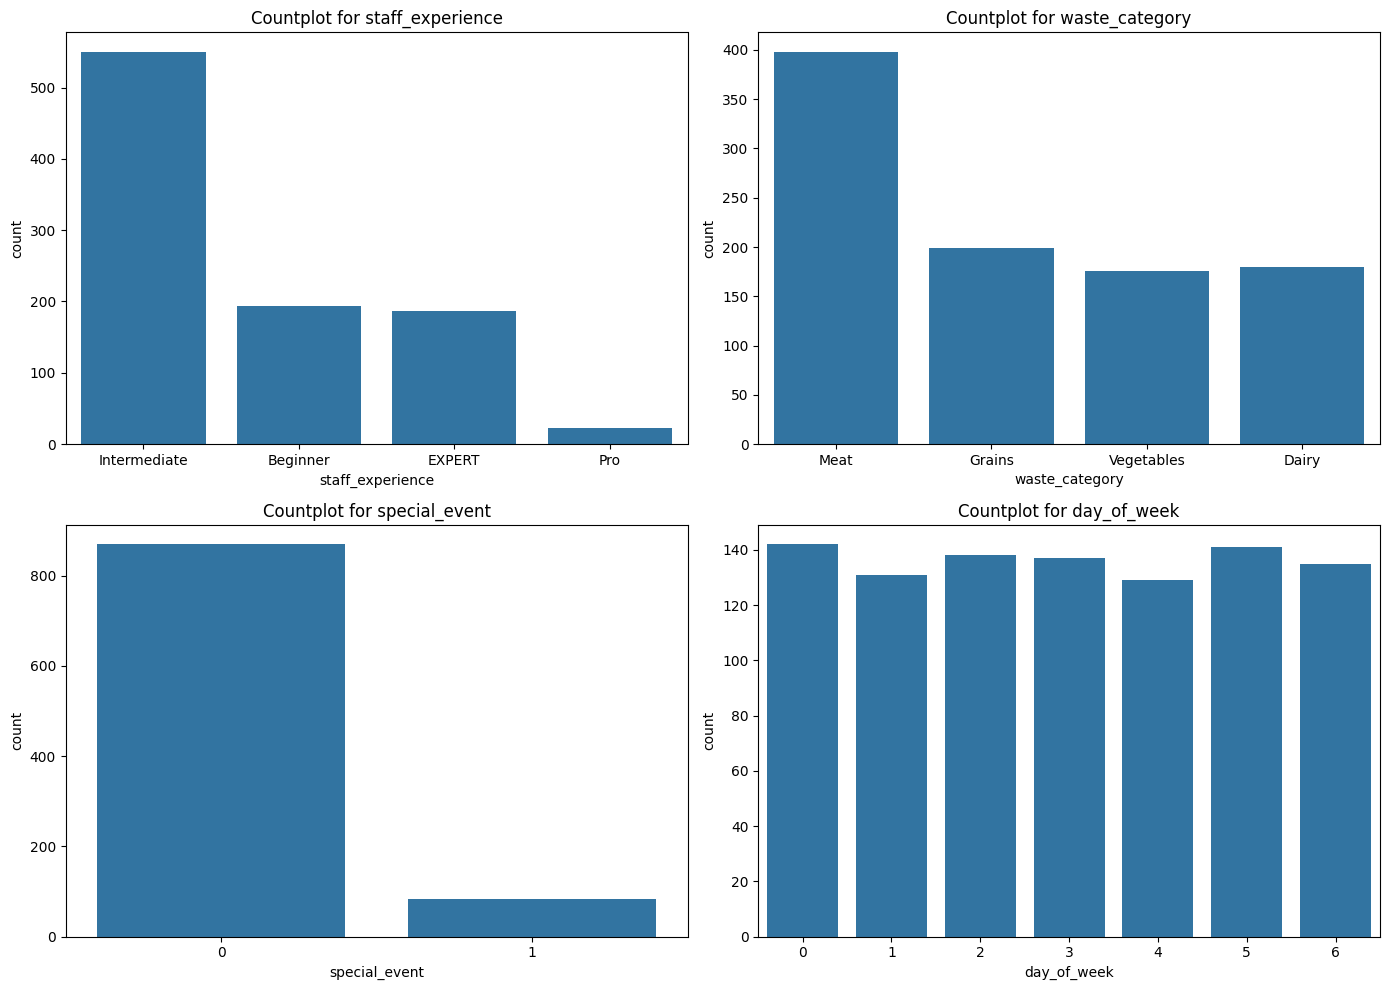

In [1198]:
# List of categorical features to visualize
categorical_feature = ['staff_experience', 'waste_category', 'special_event', 'day_of_week']

# Number of categorical features to plot
n_features = len(categorical_feature)

# Define subplot grid dimensions: 2 rows and 2 columns
rows = 2
cols = 2

# Create a figure with subplots arranged in the specified grid and size
fig, axes = plt.subplots(rows, cols, figsize=(14, 10))

# Flatten the 2D array of axes into 1D for easy iteration
axes = axes.flatten()

# Loop over each categorical feature and create a countplot on its subplot
for i, col in enumerate(categorical_feature):
    sns.countplot(data=df, x=col, ax=axes[i])  # Plot count of each category in the feature
    axes[i].set_title(f'Countplot for {col}')  # Set a title for each subplot

# Remove any unused subplots if the grid has more slots than features
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust subplot layouts to prevent overlap
plt.tight_layout()

# Display the figure with all countplots
plt.show()


Text(0.5, 1.0, 'Mean Food Waste per Staff Experience')

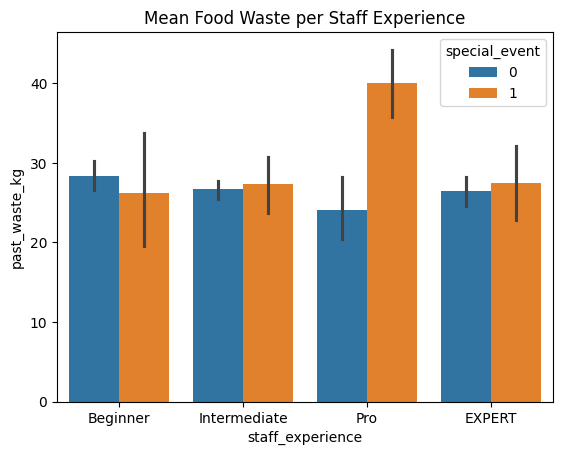

In [1199]:
# Create a barplot to visualize the average (mean) food waste for each staff experience level
# The x-axis represents different levels of staff experience, shown in a specific order
# The y-axis shows the mean value of 'past_waste_kg' for each category
# The 'hue' adds another layer by splitting each bar based on whether it was a special event or not
sns.barplot(
    data=df,
    x='staff_experience',
    y='past_waste_kg',
    order=['Beginner', 'Intermediate', 'Pro', 'EXPERT'],
    hue='special_event'
)

# Set the title of the plot
plt.title("Mean Food Waste per Staff Experience")


Text(0.5, 1.0, 'Mean Food Waste per Category')

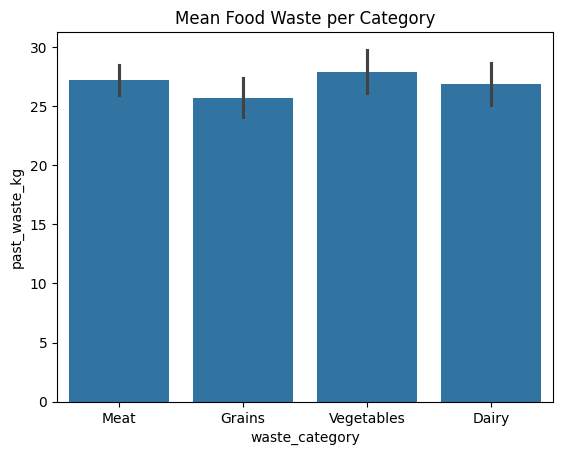

In [1200]:
sns.barplot(
    data=df,
    x='waste_category',
    y='past_waste_kg',
    
    
)

# Set the title of the plot
plt.title("Mean Food Waste per Category")


In [1201]:
# Calculate the correlation matrix between all continuous features in the DataFrame
# This will return a DataFrame showing the pairwise Pearson correlation coefficients
# 'cont_features' should be a predefined list of continuous numerical columns
corr = df[cont_features].corr()

# Display the correlation matrix
corr


,meals_served,kitchen_staff,temperature_C,humidity_percent,past_waste_kg
meals_served,1.000000,-0.032304,-0.013231,-0.039550,0.026121
kitchen_staff,-0.032304,1.000000,-0.029462,-0.023228,-0.084517
temperature_C,-0.013231,-0.029462,1.000000,0.001039,-0.002238
humidity_percent,-0.039550,-0.023228,0.001039,1.000000,0.022105
past_waste_kg,0.026121,-0.084517,-0.002238,0.022105,1.000000


Text(0.5, 1.0, 'Heatmap for Food-Service dataset')

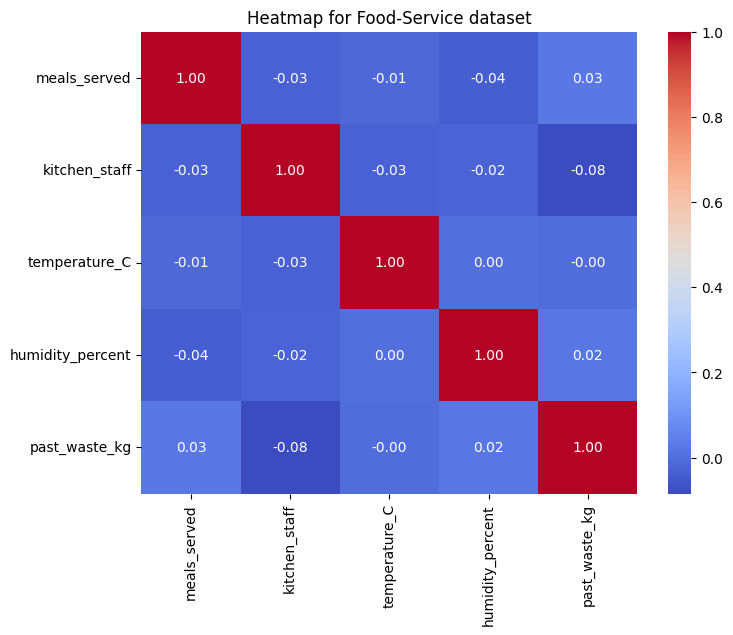

In [1202]:
# Set the figure size for the heatmap to make it more readable
plt.figure(figsize=(8, 6))

# Create a heatmap to visualize the correlation matrix
# 'annot=True' displays the correlation coefficient values inside the heatmap cells
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap for Food-Service dataset")



Insights:
Humditity and temperature,show no correlation with the number of meals served.

## Hypothesis Testing

In [1203]:
# To Group each food wastage record by special events to find the mean food wastage for event and non-event days
df.groupby('special_event')['past_waste_kg'].mean()

special_event
0    26.904996
1    27.488782
Name: past_waste_kg, dtype: float64

In [1204]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming your DataFrame is called df
# df = pd.read_csv("your_file.csv")  # if loading from file

# Split the data into two groups
event_days = df[df['special_event'] == 1]['past_waste_kg']
non_event_days = df[df['special_event'] == 0]['past_waste_kg']

# Run two-sample t-test (assuming unequal variance)
t_stat, p_value = ttest_ind(event_days, non_event_days, equal_var=False)

# One-tailed test (check if food waste is higher on event days)
if t_stat > 0:
    p_value /= 2
    print(f"t-statistic: {t_stat:.4f}")
    print(f"One-tailed p-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print("✅ Reject H0: Food waste is significantly higher on special event days.")
    else:
        print("❌ Fail to reject H0: No significant increase in food waste on event days.")
else:
    print("❌ No evidence that food waste is higher on event days (t-stat is not positive).")


t-statistic: 0.3976
One-tailed p-value: 0.3459
❌ Fail to reject H0: No significant increase in food waste on event days.


In [1205]:
df.groupby('staff_experience')['past_waste_kg'].mean()

staff_experience
Beginner        28.180520
EXPERT          26.552680
Intermediate    26.722869
Pro             25.482691
Name: past_waste_kg, dtype: float64

In [1206]:
from scipy.stats import f_oneway

# Create groups
group_low = df[df['staff_experience'] == 'Beginner']['past_waste_kg']
group_med = df[df['staff_experience'] == 'Intermediate']['past_waste_kg']
group_high = df[df['staff_experience'] == 'Pro']['past_waste_kg']
group_exp = df[df['staff_experience'] == 'EXPERT']['past_waste_kg']

# Run ANOVA
f_stat, p_value = f_oneway(group_low, group_med, group_high,group_exp)

print('F-statistic:', f_stat)
print('p-value:', p_value)

# Interpretation
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in food waste across experience levels.")
else:
    print("Fail to reject H₀: No significant difference in food waste across experience levels.")


F-statistic: 0.8298697451209377
p-value: 0.4775256101096005
Fail to reject H₀: No significant difference in food waste across experience levels.
